In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.datasets import imdb

(train_data_, train_labels_), (test_data_, test_labels_) = imdb.load_data(num_words=10000)

print ('shape(train_images)=',train_data_.shape)
print ('shape(train_labels)=',train_labels_.shape)
print ('shape(test_images)=',test_data_.shape)
print ('shape(test_labels)=',test_labels_.shape)

shape(train_images)= (25000,)
shape(train_labels)= (25000,)
shape(test_images)= (25000,)
shape(test_labels)= (25000,)


In [4]:
print (train_data_[0])
print (train_labels_[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [18]:
word_index = imdb.get_word_index()  # get the indexes of each words

# reversed the word_index maping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data_[0]])
print (decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the data

In [24]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Now vectorize the  training and test data as well as labels
x_train = vectorize_sequences(train_data_)
x_test = vectorize_sequences(test_data_)

y_train = np.asarray(train_labels_).astype('float32')
y_test  = np.asarray(test_labels_ ).astype('float32')

print (y_train)

[1. 0. 0. ... 0. 1. 0.]


## Define a model and train your data

In [26]:
from keras import models, layers

mymodel=models.Sequential()
mymodel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(16, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))

mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [27]:
mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## prepare cross-validation data from training data

In [28]:
x_cv=x_train[:10000]
x_train_part = x_train[10000:]
y_cv=y_train[:10000]
y_train_part = y_train[10000:]

In [30]:
history = mymodel.fit(x_train_part, y_train_part, epochs=20, batch_size=512, validation_data=(x_cv, y_cv))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1235 - accuracy: 0.9609 - val_loss: 0.2922 - val_accuracy: 0.8869
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1001 - accuracy: 0.9692 - val_loss: 0.3162 - val_accuracy: 0.8831
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0853 - accuracy: 0.9744 - val_loss: 0.3261 - val_accuracy: 0.8830
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0712 - accuracy: 0.9800 - val_loss: 0.3579 - val_accuracy: 0.8789
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.0566 - accuracy: 0.9860 - val_loss: 0.4026 - val_accuracy: 0.8689
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0472 - accuracy: 0.9893 - val_loss: 0.4389 - val_accuracy: 0.8654
Epoch 7/20
15000/15000 [==============================] - 1s 76us/st

In [32]:
history_dict=history.history
history_dict.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

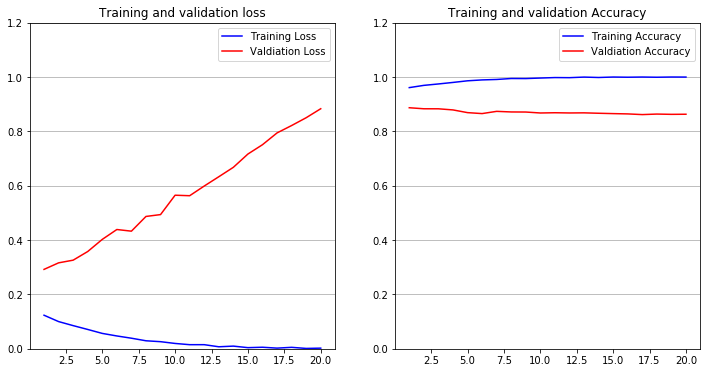

In [47]:
import matplotlib.pyplot as plt

acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1, len(acc)+1)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Valdiation Loss')
plt.title('Training and validation loss')
plt.ylim([0,1.2]); plt.grid(axis='y'); plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Valdiation Accuracy')
plt.title('Training and validation Accuracy')
plt.ylim([0,1.2]); plt.grid(axis='y'); plt.legend()
plt.show()



High accuracy in the Training data and low accuracy in the vlidation data means the case of overfitting. Next, use only 4-5 epochs and test the test case.

In [48]:
mymodel=models.Sequential()
mymodel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(16, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=5, batch_size=512)
results=mymodel.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 4s 145us/step - loss: 0.4585 - accuracy: 0.8136
Epoch 2/5
25000/25000 [==============================] - 2s 64us/step - loss: 0.2578 - accuracy: 0.9073
Epoch 3/5
25000/25000 [==============================] - 1s 47us/step - loss: 0.1964 - accuracy: 0.9302
Epoch 4/5
25000/25000 [==============================] - 1s 50us/step - loss: 0.1618 - accuracy: 0.9421
Epoch 5/5
25000/25000 [==============================] - 3s 103us/step


In [50]:
print (results)  # prints out loss and accuracy

[0.36088775931358336, 0.8645200133323669]


## Experiment with the code: 

1. Reduce # of hidden layers to 1.
2. Increase # of hidden layers to 4.
3. Increase the number of hidden units use 32 and 64
4. Use mse lossfunction instead of binary_crossentropy

In [51]:
#case 1
mymodel=models.Sequential()
mymodel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(1,  activation='sigmoid'))

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=5, batch_size=512)
results=mymodel.evaluate(x_test, y_test)
print (results) 

Epoch 1/5
25000/25000 [==============================] - 3s 126us/step - loss: 0.4413 - accuracy: 0.8297
Epoch 2/5
25000/25000 [==============================] - 1s 49us/step - loss: 0.2701 - accuracy: 0.9060
Epoch 3/5
25000/25000 [==============================] - 1s 47us/step - loss: 0.2122 - accuracy: 0.9265
Epoch 4/5
25000/25000 [==============================] - 1s 57us/step - loss: 0.1808 - accuracy: 0.9370
Epoch 5/5
25000/25000 [==============================] - 3s 106us/step
[0.28988746601104737, 0.8843200206756592]


In [52]:
#case 2
mymodel=models.Sequential()
mymodel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(16, activation='relu'))
mymodel.add(layers.Dense(16, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=5, batch_size=512)
results=mymodel.evaluate(x_test, y_test)
print ('')
print ('results:',results) 

Epoch 1/5
25000/25000 [==============================] - 3s 103us/step - loss: 0.4631 - accuracy: 0.8188
Epoch 2/5
25000/25000 [==============================] - 1s 49us/step - loss: 0.2537 - accuracy: 0.9095
Epoch 3/5
25000/25000 [==============================] - 1s 50us/step - loss: 0.1977 - accuracy: 0.9275
Epoch 4/5
25000/25000 [==============================] - 1s 54us/step - loss: 0.1641 - accuracy: 0.9408
Epoch 5/5
25000/25000 [==============================] - 3s 115us/step

results: [0.3304970529556274, 0.8754799962043762]


In [53]:
#case 3
mymodel=models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(32, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=5, batch_size=512)
results=mymodel.evaluate(x_test, y_test)
print ('')
print ('results:',results) 

Epoch 1/5
25000/25000 [==============================] - 4s 147us/step - loss: 0.4338 - accuracy: 0.8132
Epoch 2/5
25000/25000 [==============================] - 2s 75us/step - loss: 0.2409 - accuracy: 0.9120
Epoch 3/5
25000/25000 [==============================] - 2s 79us/step - loss: 0.1910 - accuracy: 0.9285
Epoch 4/5
25000/25000 [==============================] - 2s 76us/step - loss: 0.1584 - accuracy: 0.9410
Epoch 5/5
25000/25000 [==============================] - 3s 118us/step

results: [0.33458000585079195, 0.8755599856376648]


In [54]:
#case 4
mymodel=models.Sequential()
mymodel.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(x_train, y_train, epochs=5, batch_size=512)
results=mymodel.evaluate(x_test, y_test)
print ('')
print ('results:',results) 

Epoch 1/5
25000/25000 [==============================] - 3s 138us/step - loss: 0.4191 - accuracy: 0.8138
Epoch 2/5
25000/25000 [==============================] - 2s 73us/step - loss: 0.2404 - accuracy: 0.9073
Epoch 3/5
25000/25000 [==============================] - 2s 71us/step - loss: 0.1847 - accuracy: 0.9311
Epoch 4/5
25000/25000 [==============================] - 2s 72us/step - loss: 0.1443 - accuracy: 0.9448
Epoch 5/5
25000/25000 [==============================] - 4s 143us/step

results: [0.3514931475973129, 0.8769199848175049]


In [60]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(25000, 10000) (25000,) (25000, 10000) (25000,)


## Test on the moon data

In [80]:
#Obtain data set
from sklearn.datasets import make_moons
Nsample=5000
Ntest=int(Nsample/5)

X_moon, Y_moon = make_moons(n_samples=Nsample, noise=0.15, random_state=42)

#split the data into training and testing set 
indices=np.random.permutation(Nsample)

#The following is WRONG as shuffling the both the X and Y value separately will change the data set.

np.random.shuffle(X_moon); 
np.random.shuffle(Y_moon)

X_test=X_moon[:Ntest]; X_train=X_moon[Ntest:]
Y_test=Y_moon[:Ntest]; Y_train=Y_moon[Ntest:]

print ('Original data shape:   X:',X_moon.shape,  '  Y:', Y_moon.shape)
print ('Training set shapes:   X:',X_train.shape, '  Y:', Y_train.shape)
print ('Test     set shapes:   X:',X_test.shape,  '  Y:', Y_test.shape)

# Let's separate 20% of the training data for cross-validation
X_cv=X_train[:800]; Y_cv=Y_train[:800];
X_train_part=X_train[800:]; Y_train_part=Y_train[800:]; 


Original data shape:   X: (5000, 2)   Y: (5000,)
Training set shapes:   X: (4000, 2)   Y: (4000,)
Test     set shapes:   X: (1000, 2)   Y: (1000,)


In [115]:
mymodel=models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(2,)))
mymodel.add(layers.Dense(32, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))
#mymodel.summary()

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_res = mymodel.fit(X_train_part, Y_train_part, epochs=3, batch_size=512, validation_data=(X_cv, Y_cv))

Train on 3200 samples, validate on 800 samples
Epoch 1/3
3200/3200 [==============================] - 1s 230us/step - loss: 0.6938 - accuracy: 0.4903 - val_loss: 0.6941 - val_accuracy: 0.4950
Epoch 2/3
3200/3200 [==============================] - 0s 6us/step - loss: 0.6931 - accuracy: 0.5094 - val_loss: 0.6941 - val_accuracy: 0.5125
Epoch 3/3
3200/3200 [==============================] - 0s 13us/step - loss: 0.6930 - accuracy: 0.5019 - val_loss: 0.6938 - val_accuracy: 0.5188


In [83]:
res_dict=model_res.history
res_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

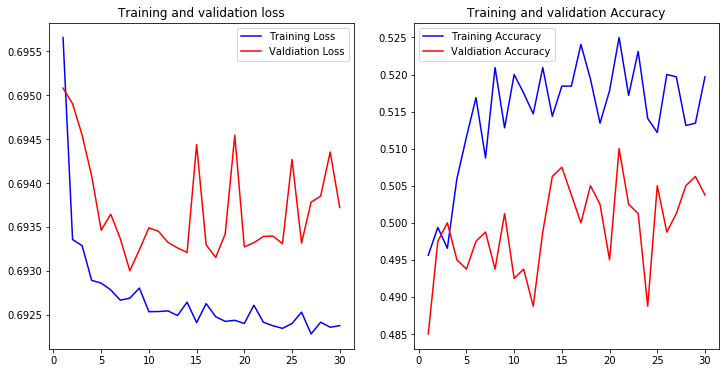

In [85]:
import matplotlib.pyplot as plt

acc=res_dict['accuracy']
val_acc=res_dict['val_accuracy']
loss=res_dict['loss']
val_loss=res_dict['val_loss']

epochs=range(1, len(acc)+1)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Valdiation Loss')
plt.title('Training and validation loss')
#plt.ylim([0,1.2]); plt.grid(axis='y'); 
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Valdiation Accuracy')
plt.title('Training and validation Accuracy')
#plt.ylim([0,1.2]); plt.grid(axis='y'); 
plt.legend()
plt.show()

In [134]:
def PlotDecisionBoundary(model, X, Y, steps):
    x_min, x_max=X[:,0].min(), X[:,0].max()
    y_min, y_max=X[:,1].min(), X[:,1].max()
    
    #x_min *=0.9; y_min *=0.9
    #x_max *=1.1; y_max *=1.1

    xx_=np.linspace(x_min, x_max, steps)
    yy_=np.linspace(y_min, y_max, steps)

    (xx, yy)= np.meshgrid(xx_,yy_)
    all_pts=np.c_[xx.ravel(), yy.ravel()]
    print (all_pts.shape)
    
    Z= mymodel.predict(all_pts)
    Z=Z.reshape(xx.shape)

    plt.figure(figsize=(6,6))
    #plt.contourf(xx,yy,Z, cmap=plt.cm.Spectral)
    plt.contourf(xx,yy,Z, cmap='RdBu')
    plt.scatter(X[:,0], X[:,1], c=Y.flatten(), cmap=plt.cm.Spectral)
    plt.show()


#PlotDecisionBoundary(mymodel, X_train, Y_train)
#print (X_train.shape)
#mymodel.predict(X_train[:100])

In [120]:
X_moon, Y_moon = make_moons(n_samples=400, noise=0.15, random_state=42)


indices=np.random.permutation(400)

X_test=X_moon[indices[:80]]; X_train=X_moon[indices[80:]];
Y_test=Y_moon[indices[:80]]; Y_train=Y_moon[indices[80:]];

print ('Original data shape:   X:',X_moon.shape,  '  Y:', Y_moon.shape)
print ('Training set shapes:   X:',X_train.shape, '  Y:', Y_train.shape)
print ('Test     set shapes:   X:',X_test.shape,  '  Y:', Y_test.shape)

X_cv=X_train[:80]; Y_cv=Y_train[:80]
X_train_part=X_train[80:]; Y_train_part=Y_train[80:]

Original data shape:   X: (400, 2)   Y: (400,)
Training set shapes:   X: (320, 2)   Y: (320,)
Test     set shapes:   X: (80, 2)   Y: (80,)


In [124]:
#keras.backend.clear_session()
mymodel=models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(2,)))
mymodel.add(layers.Dense(32, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))
#mymodel.summary()

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_res = mymodel.fit(X_train_part, Y_train_part, epochs=30, batch_size=128, validation_data=(X_cv, Y_cv))

Train on 240 samples, validate on 80 samples
Epoch 1/30
240/240 [==============================] - 0s 628us/step - loss: 0.6815 - accuracy: 0.6333 - val_loss: 0.6557 - val_accuracy: 0.7750
Epoch 2/30
240/240 [==============================] - 0s 36us/step - loss: 0.6483 - accuracy: 0.7792 - val_loss: 0.6335 - val_accuracy: 0.7875
Epoch 3/30
240/240 [==============================] - 0s 135us/step - loss: 0.6248 - accuracy: 0.8000 - val_loss: 0.6145 - val_accuracy: 0.7875
Epoch 4/30
240/240 [==============================] - 0s 69us/step - loss: 0.6046 - accuracy: 0.8125 - val_loss: 0.5983 - val_accuracy: 0.7875
Epoch 5/30
240/240 [==============================] - 0s 57us/step - loss: 0.5864 - accuracy: 0.8208 - val_loss: 0.5834 - val_accuracy: 0.7875
Epoch 6/30
240/240 [==============================] - 0s 28us/step - loss: 0.5703 - accuracy: 0.8208 - val_loss: 0.5705 - val_accuracy: 0.7875
Epoch 7/30
240/240 [==============================] - 0s 30us/step - loss: 0.5555 - accuracy: 0

In [125]:
res_dict=model_res.history
res_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

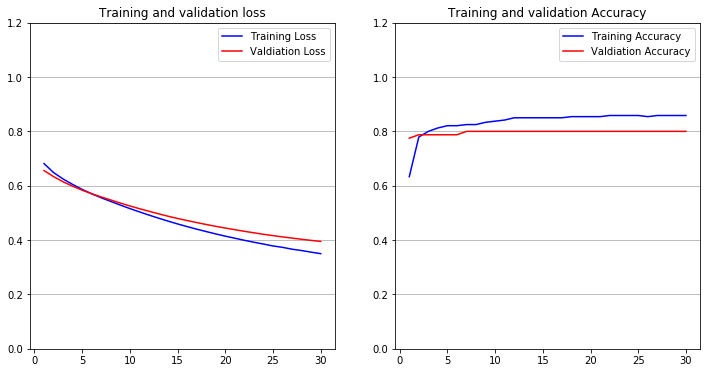

In [136]:
import matplotlib.pyplot as plt

acc=res_dict['accuracy']
val_acc=res_dict['val_accuracy']
loss=res_dict['loss']
val_loss=res_dict['val_loss']

epochs=range(1, len(acc)+1)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Valdiation Loss')
plt.title('Training and validation loss')
plt.ylim([0,1.2]); plt.grid(axis='y'); 
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Valdiation Accuracy')
plt.title('Training and validation Accuracy')
plt.ylim([0,1.2]); plt.grid(axis='y'); 
plt.legend()
plt.show()

In [127]:
#keras.backend.clear_session()
mymodel=models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(2,)))
mymodel.add(layers.Dense(32, activation='relu'))
mymodel.add(layers.Dense(1,  activation='sigmoid'))
#mymodel.summary()

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(X_test, Y_test, epochs=10, batch_size=128)

Epoch 1/10
80/80 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 0s 23us/step - loss: 0.6957 - accuracy: 0.5125
Epoch 3/10
80/80 [==============================] - 0s 24us/step - loss: 0.6801 - accuracy: 0.5375
Epoch 4/10
80/80 [==============================] - 0s 41us/step - loss: 0.6675 - accuracy: 0.5875
Epoch 5/10
80/80 [==============================] - 0s 22us/step - loss: 0.6566 - accuracy: 0.6625
Epoch 6/10
80/80 [==============================] - 0s 20us/step - loss: 0.6468 - accuracy: 0.6875
Epoch 7/10
80/80 [==============================] - 0s 25us/step - loss: 0.6376 - accuracy: 0.7000
Epoch 8/10
80/80 [==============================] - 0s 38us/step - loss: 0.6290 - accuracy: 0.7500
Epoch 9/10
80/80 [==============================] - 0s 44us/step - loss: 0.6208 - accuracy: 0.7625
Epoch 10/10
80/80 [==============================] - 0s 40us/step - loss: 0.6129 - accuracy: 0.7875


(160000, 2)


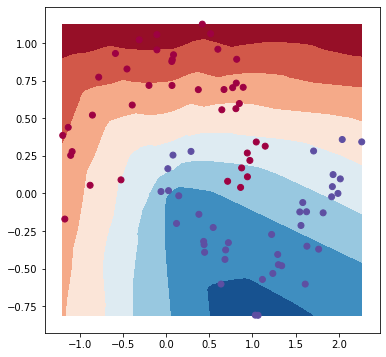

In [135]:
PlotDecisionBoundary(mymodel, X_test, Y_test, 400)